In [1]:
import os
import sys

import gensim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud

module_path = os.path.abspath(os.path.join("../../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.config import END_OF_POST_TOKEN, PATH_INTERIM_CORPUS  # noqa: E402
from src.features.build_features import get_corpus_id2word  # noqa: E402

In [2]:
# The gambling corpus was introduced for the first time in the previous
# edition of eRisk, thus we only have documents of the testing phase.
CORPUS_KIND = "xml"
CORPUS_NAME = "gambling"

## Generate a DataFrame for the testing corpus

In [3]:
input_file_path_test = os.path.join(
    PATH_INTERIM_CORPUS, CORPUS_KIND, CORPUS_NAME, f"{CORPUS_NAME}-test-clean.txt"
)

In [4]:
labels = []
documents = []
with open(input_file_path_test) as f:
    for line in f:
        label, document = line.split(maxsplit=1)
        labels.append(label)
        posts = document.split(END_OF_POST_TOKEN)
        documents.append(posts)
df_test = pd.DataFrame({"label": labels, "posts": documents})

## Define functions to obtain interesting features from the documents

In [6]:
TextBlob(df_test.posts[0][0]).sentiment

Sentiment(polarity=-0.0032828282828282892, subjectivity=0.3164862914862915)

In [7]:
def get_num_tokens(posts_list):
    return [len(post.split()) for post in posts_list]


def get_num_tokens_first_person(posts_list):
    return [
        sum(1 if word == "i" else 0 for word in post.split()) for post in posts_list
    ]


def get_polarity(posts_list):
    return [round(TextBlob(post).sentiment.polarity, 2) for post in posts_list]


def get_subjectivity(posts_list):
    return [round(TextBlob(post).sentiment.subjectivity, 2) for post in posts_list]

## Aplico las funciones al corpus de testeo

In [8]:
df_test["num_tokens"] = df_test.posts.apply(get_num_tokens)
df_test["num_tokens_first_person"] = df_test.posts.apply(get_num_tokens_first_person)
df_test["polarity"] = df_test.posts.apply(get_polarity)
df_test["subjectivity"] = df_test.posts.apply(get_subjectivity)

In [9]:
df_test

,label,posts,num_tokens,num_tokens_primera_persona,polarity,subjectivity
0,positive,[sports betting 45k in debt feeling very depre...,"[234, 93, 25, 27, 118, 74, 28, 5, 28, 6, 31, 3...","[12, 2, 1, 2, 5, 5, 2, 0, 1, 0, 2, 3, 3, 1, 2,...","[-0.0, 0.03, 0.0, 0.19, -0.22, -0.18, 0.2, 0.5...","[0.32, 0.38, 0.0, 0.63, 0.37, 0.52, 0.9, 0.65,..."
1,positive,[number with low self esteem honest opinions p...,"[8, 19, 8, 44, 14, 12, 17, 22, 113, 13, 29, 59]","[0, 1, 0, 4, 1, 0, 1, 2, 6, 0, 1, 1]","[0.3, 0.43, 0.8, 0.25, 0.25, 0.5, 0.25, 0.5, 0...","[0.6, 0.6, 0.7, 0.42, 0.33, 0.83, 0.33, 0.5, 0..."
2,positive,[if you can stop now you will be ahead in the ...,"[98, 13, 227, 244, 11, 5, 16, 2, 3, 2, 238, 17...","[4, 1, 7, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, ...","[0.06, 0.25, 0.23, 0.2, 0.7, 0.0, 0.0, 0.8, 0....","[0.41, 0.5, 0.5, 0.52, 0.6, 0.0, 0.07, 0.75, 1..."
3,positive,"[another day healthier, congratulations, nice ...","[3, 1, 8, 18, 11, 6, 2, 10, 211, 5, 16, 40, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 4, 0, 2, ...","[0.0, 0.0, 0.31, 0.25, 0.0, -0.17, 0.8, 0.43, ...","[0.0, 0.0, 0.49, 0.25, 0.0, 0.43, 1.0, 0.49, 0..."
4,positive,[day number online gambling has destroyed me i...,"[31, 4, 46, 54, 75, 26, 118, 33, 5, 105, 59, 2...","[3, 0, 3, 2, 4, 0, 8, 2, 0, 7, 2, 0, 6, 3, 13,...","[0.09, -0.31, 0.18, 0.07, 0.18, 0.0, 0.02, 0.1...","[0.26, 0.69, 0.61, 0.47, 0.5, 0.0, 0.49, 0.33,..."
...,...,...,...,...,...,...
2343,negative,"[it comes from nuts wink, when it's summer in ...","[5, 22, 19, 4, 40, 22, 229, 38, 17, 23, 52, 18...","[0, 1, 0, 0, 0, 0, 17, 3, 0, 1, 4, 0, 0, 0, 0,...","[0.0, -0.31, 0.0, 0.0, 0.0, -0.26, -0.03, 0.07...","[0.0, 0.69, 0.0, 0.0, 0.5, 0.54, 0.45, 0.47, 0..."
2344,negative,[there's a terminal at work for us to run cred...,"[43, 32, 26, 8, 12, 22, 48, 3, 10, 23, 18, 12,...","[1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, ...","[-0.15, 0.05, 0.0, -0.7, 0.0, 0.01, 0.03, 0.0,...","[0.32, 0.25, 0.0, 1.0, 0.0, 0.72, 0.33, 0.0, 0..."
2345,negative,"[anyone having this scene link, not working, a...","[5, 2, 10, 10, 5, 2, 2, 2, 7, 2, 6, 2, 2, 1, 4...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, -0.17, 0.0, 0.0, 0.6, 0.0, 1.0...","[0.0, 0.0, 0.0, 0.31, 0.0, 0.0, 0.95, 0.0, 1.0..."
2346,negative,[what the rocket league community achieved sin...,"[12, 8, 11, 5, 6, 3, 10, 2, 9, 7, 9, 12, 23, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[0.0, 0.0, 0.0, -0.5, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Compare the datasets

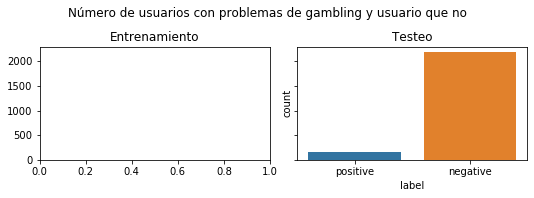

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 3))
ax1.set_title("Training")
ax2.set_title("Testing")
fig.suptitle("Number of users with problematic gambling")
sns.countplot(x="label", data=df_test, ax=ax2)
plt.tight_layout(pad=2.8, w_pad=0.5, h_pad=1.0);

No handles with labels found to put in legend.
No handles with labels found to put in legend.


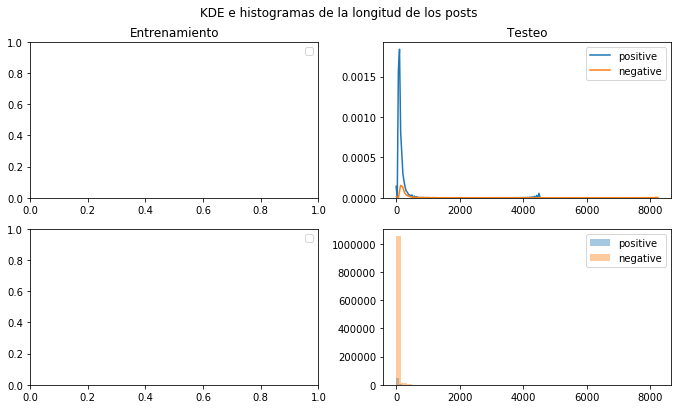

In [11]:
num_tokens_test = df_test.groupby("label").agg({"num_tokens": sum})
num_tokens_test = num_tokens_test.num_tokens.apply(lambda x: np.array(x))
num_tokens_test.apply(lambda x: x.sort())

fig, axis = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(10, 6))

axis[0, 0].set_title("Training")
axis[0, 1].set_title("Testing")
fig.suptitle("Posts length")

sns.kdeplot(num_tokens_test["positive"], ax=axis[0, 1], label="positive")
sns.kdeplot(num_tokens_test["negative"], ax=axis[0, 1], label="negative")

sns.distplot(num_tokens_test["positive"], ax=axis[1, 1], label="positive", kde=False)
sns.distplot(num_tokens_test["negative"], ax=axis[1, 1], label="negative", kde=False)

for ax in axis.ravel():
    ax.legend()

plt.tight_layout(pad=2.8, w_pad=0.5, h_pad=1.0);

No handles with labels found to put in legend.
No handles with labels found to put in legend.


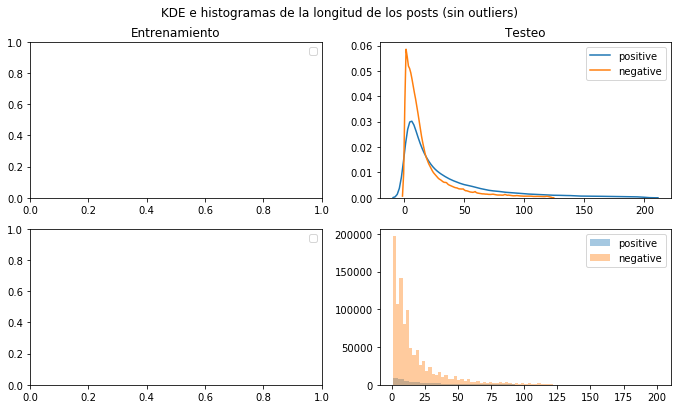

In [12]:
outlier_test_negative, outlier_test_positive = (
    np.quantile(num_tokens_test[0], 0.97),
    np.quantile(num_tokens_test[1], 0.97),
)

fig, axis = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(10, 6))
axis[0, 0].set_title("Training")
axis[0, 1].set_title("Testing")
fig.suptitle("Posts length (without outliers)")

without_outliers = num_tokens_test["positive"][
    num_tokens_test["positive"] < outlier_test_positive
]
sns.kdeplot(without_outliers, ax=axis[0, 1], label="positive")
sns.distplot(without_outliers, ax=axis[1, 1], label="positive", kde=False)

without_outliers = num_tokens_test["negative"][
    num_tokens_test["negative"] < outlier_test_negative
]
sns.kdeplot(without_outliers, ax=axis[0, 1], label="negative")
sns.distplot(without_outliers, ax=axis[1, 1], label="negative", kde=False)

for ax in axis.ravel():
    ax.legend()

plt.tight_layout(pad=2.8, w_pad=0.5, h_pad=1.0);

No handles with labels found to put in legend.
No handles with labels found to put in legend.


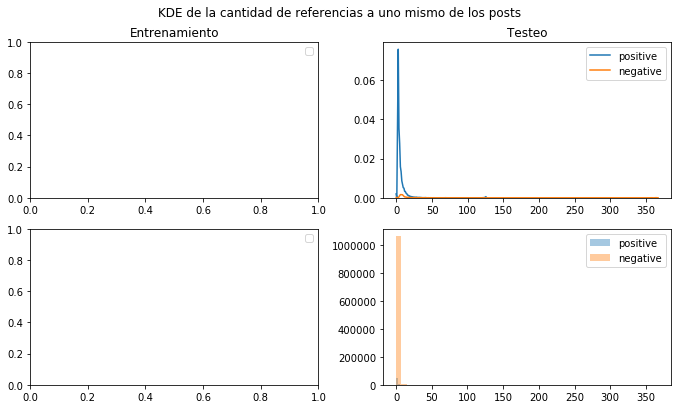

In [13]:
num_yo_test = df_test.groupby("label").agg({"num_tokens_first_person": sum})
num_yo_test = num_yo_test.num_tokens_first_person.apply(lambda x: np.array(x))
num_yo_test.apply(lambda x: x.sort())

fig, axis = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(10, 6))
axis[0, 0].set_title("Training")
axis[0, 1].set_title("Testing")
fig.suptitle("References to the first person in the posts")

sns.kdeplot(num_yo_test["positive"], ax=axis[0, 1], label="positive")
sns.distplot(num_yo_test["positive"], ax=axis[1, 1], label="positive", kde=False)
sns.kdeplot(num_yo_test["negative"], ax=axis[0, 1], label="negative")
sns.distplot(num_yo_test["negative"], ax=axis[1, 1], label="negative", kde=False)

for ax in axis.ravel():
    ax.legend()

plt.tight_layout(pad=2.8, w_pad=0.5, h_pad=1.0);

No handles with labels found to put in legend.
No handles with labels found to put in legend.


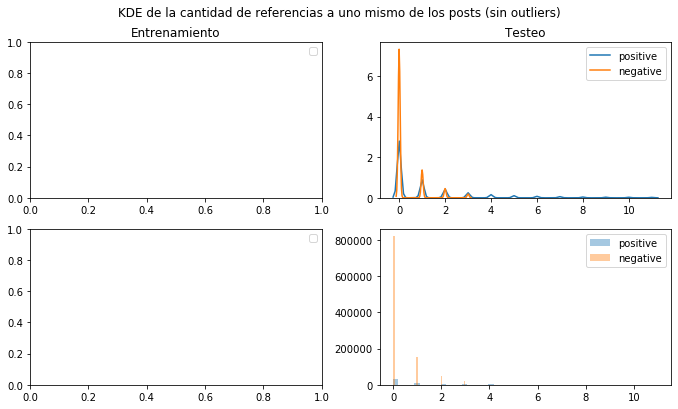

In [14]:
outlier_threshold = 0.98
outlier_test_negative, outlier_test_positive = (
    np.quantile(num_yo_test[0], outlier_threshold),
    np.quantile(num_yo_test[1], outlier_threshold),
)

fig, axis = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(10, 6))
axis[0, 0].set_title("Training")
axis[0, 1].set_title("Testing")
fig.suptitle("References to the first person in the posts (without outliers)")

without_outliers = num_yo_test["positive"][
    num_yo_test["positive"] < outlier_test_positive
]
sns.kdeplot(without_outliers, ax=axis[0, 1], label="positive")
sns.distplot(without_outliers, ax=axis[1, 1], label="positive", kde=False)

without_outliers = num_yo_test["negative"][
    num_yo_test["negative"] < outlier_test_negative
]
sns.kdeplot(without_outliers, ax=axis[0, 1], label="negative")
sns.distplot(without_outliers, ax=axis[1, 1], label="negative", kde=False)

for ax in axis.ravel():
    ax.legend()

plt.tight_layout(pad=2.8, w_pad=0.5, h_pad=1.0);

## Latent Dirichlet Allocation (LDA)
Aplico LDA para obtener los tópicos más relevantes tanto de documentos de personas positivas como de personas negativas para problemas de gambling, tanto para entrenamiento y para testeo.

In [28]:
posts_test = []
for user_posts in df_test.posts:
    aux_list_posts = []
    for post in user_posts:
        for word in post.split():
            aux_list_posts.append(word)
    posts_test.append(aux_list_posts)

In [29]:
posts_test[0][:10]

['sports',
 'betting',
 '45k',
 'in',
 'debt',
 'feeling',
 'very',
 'depressed',
 'i',
 'am']

In [30]:
corpus, id2word, bigram = get_corpus_id2word(posts_test)

In [31]:
lda_test = gensim.models.LdaModel(
    corpus=corpus,
    num_topics=15,
    id2word=id2word,
    chunksize=100,
    passes=50,
    eval_every=1,
    random_state=30,
    per_word_topics=True,
)

In [32]:
lda_test.print_topics(num_topics=-1, num_words=20)

[(0,
  '0.128*"been_removed" + 0.109*"any_questions" + 0.085*"post_has" + 0.049*"unfortunately_your" + 0.029*"our_rules" + 0.028*"please_check" + 0.027*"sign_up" + 0.027*"moderators" + 0.023*"ufc" + 0.022*"submission" + 0.019*"meme" + 0.018*"costa_rica" + 0.018*"image" + 0.018*"text" + 0.015*"make_sure" + 0.014*"hasn\'t_been" + 0.014*"title" + 0.013*"khabib" + 0.013*"check" + 0.012*"receive"'),
 (1,
  '0.008*"games" + 0.008*"team" + 0.007*"players" + 0.005*"playing" + 0.005*"vs" + 0.005*"player" + 0.005*"season" + 0.004*"level" + 0.004*"build" + 0.004*"damage" + 0.004*"played" + 0.003*"against" + 0.003*"match" + 0.003*"win" + 0.003*"fight" + 0.003*"top" + 0.003*"card" + 0.002*"character" + 0.002*"fun" + 0.002*"league"'),
 (2,
  '0.119*"ne" + 0.118*"u" + 0.045*"ve" + 0.041*"bir" + 0.035*"da" + 0.032*"pm" + 0.030*"bu" + 0.026*"sen" + 0.019*"ama" + 0.017*"ben" + 0.017*"ki" + 0.016*"o" + 0.015*"bi" + 0.015*"iin" + 0.013*"ali" + 0.013*"mi" + 0.012*"var" + 0.012*"m" + 0.011*"kan" + 0.010*"gi

In [33]:
top_topics_test = lda_test.get_document_topics(corpus[1], minimum_probability=0.0)
topic_vec_test = [top_topics_test[i][1] for i in range(10)]
top_topics_test, topic_vec_test

([(0, 0.0005385724),
  (1, 0.0005385735),
  (2, 0.000538573),
  (3, 0.1536912),
  (4, 0.16660921),
  (5, 0.0005385725),
  (6, 0.0005385736),
  (7, 0.025800686),
  (8, 0.00053857244),
  (9, 0.045072064),
  (10, 0.15377606),
  (11, 0.0005385736),
  (12, 0.00053857296),
  (13, 0.20659183),
  (14, 0.24415037)],
 [0.0005385724,
  0.0005385735,
  0.000538573,
  0.1536912,
  0.16660921,
  0.0005385725,
  0.0005385736,
  0.025800686,
  0.00053857244,
  0.045072064])

## Graphs related to the posts sentiment analysis

No handles with labels found to put in legend.
No handles with labels found to put in legend.


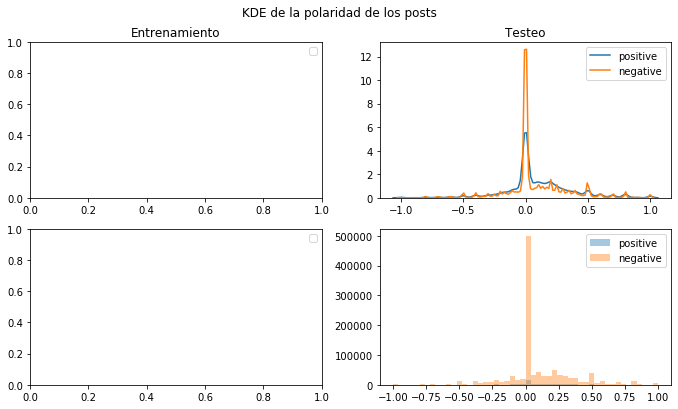

In [34]:
polarity_test = df_test.groupby("label").agg({"polarity": sum})
polarity_test = polarity_test.polarity.apply(lambda x: np.array(x))

fig, axis = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(10, 6))
axis[0, 0].set_title("Training")
axis[0, 1].set_title("Testing")
fig.suptitle("Polarity of the posts")

sns.kdeplot(polarity_test["positive"], ax=axis[0, 1], label="positive")
sns.distplot(polarity_test["positive"], ax=axis[1, 1], label="positive", kde=False)
sns.kdeplot(polarity_test["negative"], ax=axis[0, 1], label="negative")
sns.distplot(polarity_test["negative"], ax=axis[1, 1], label="negative", kde=False)

for ax in axis.ravel():
    ax.legend()

plt.tight_layout(pad=2.8, w_pad=0.5, h_pad=1.0);

No handles with labels found to put in legend.
No handles with labels found to put in legend.


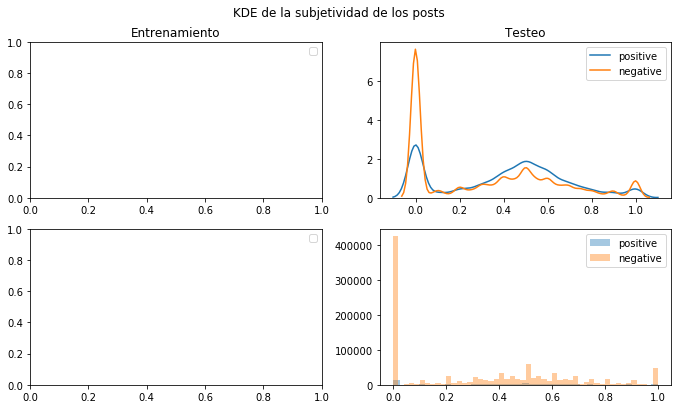

In [35]:
subjectivity_test = df_test.groupby("label").agg({"subjectivity": sum})
subjectivity_test = subjectivity_test.subjectivity.apply(lambda x: np.array(x))

fig, axis = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(10, 6))
axis[0, 0].set_title("Training")
axis[0, 1].set_title("Testing")
fig.suptitle("KDE de la subjetividad de los posts")
fig.suptitle("Subjectivity of the posts")

sns.kdeplot(subjectivity_test["positive"], ax=axis[0, 1], label="positive")
sns.distplot(subjectivity_test["positive"], ax=axis[1, 1], label="positive", kde=False)
sns.kdeplot(subjectivity_test["negative"], ax=axis[0, 1], label="negative")
sns.distplot(subjectivity_test["negative"], ax=axis[1, 1], label="negative", kde=False)

for ax in axis.ravel():
    ax.legend()

plt.tight_layout(pad=2.8, w_pad=0.5, h_pad=1.0);

##  Word cloud

In [36]:
plain_test_posts = [p for _posts in df_test.posts for p in _posts]
plain_posts = plain_test_posts

In [37]:
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b[\w']+\b", use_idf=True)
vectorizer.fit(plain_posts)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern="(?u)\\b[\\w']+\\b",
                tokenizer=None, use_idf=True, vocabulary=None)

In [38]:
idx2word = {idx: word for (word, idx) in vectorizer.vocabulary_.items()}

In [39]:
idf_sort_idxs = np.argsort(vectorizer.idf_)

print("Top 10 words with biggest IDF")
for i in idf_sort_idxs[:10]:
    print(f"'{idx2word[i]}': {vectorizer.idf_[i]}")

'the': 2.023549443832473
'to': 2.244728476319721
'a': 2.2510673781691857
'and': 2.3866481555690084
'i': 2.4005949258189543
'of': 2.5515762125693957
'is': 2.60412836838121
'in': 2.6245766888656914
'number': 2.6560737398518137
'you': 2.6763374310088706


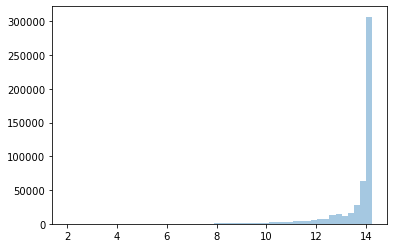

In [40]:
# Distribución de los valores de idf en todo el dataset.
sns.distplot(vectorizer.idf_, kde=False);

In [41]:
min_percentile = 0.1
min_idf_allowed = np.percentile(vectorizer.idf_, min_percentile)

### Dataset de Prueba

In [42]:
users_posts = df_test.posts
"""
allwords = []
for user_posts in users_posts:
    for post in user_posts:
        for word in post.split():
            if word in vectorizer.vocabulary_:
                current_idx = vectorizer.vocabulary_[word]
                if vectorizer.idf_[current_idx] > min_idf_allowed:
                    allwords.append(word)
"""
allwords = [
    word
    for user_posts in users_posts
    for post in user_posts
    for word in post.split()
    if (word in vectorizer.vocabulary_)
    and (vectorizer.idf_[vectorizer.vocabulary_[word]] > min_idf_allowed)
]

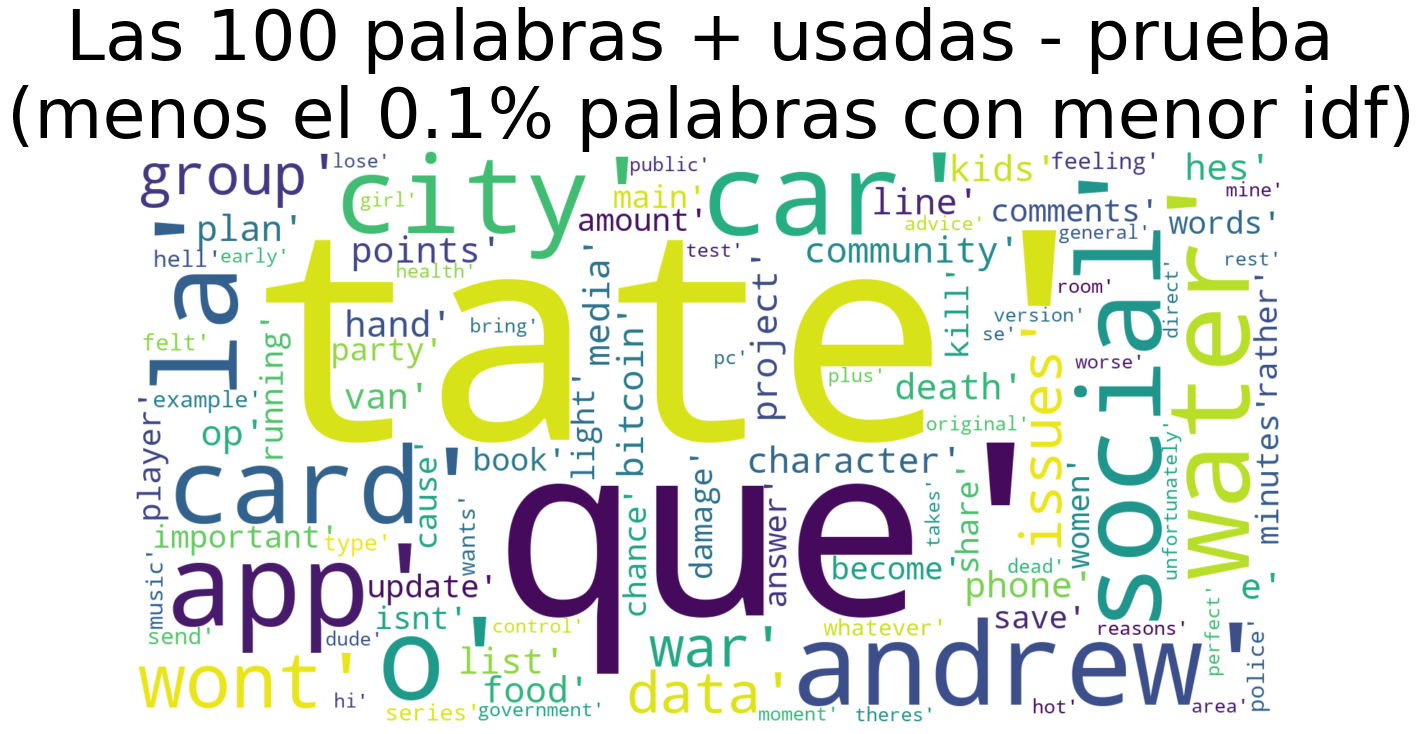

In [43]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(
    str(mostcommon)
)
fig = plt.figure(figsize=(30, 10), facecolor="white")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(
    f"Las 100 palabras + usadas - prueba \n(menos el {min_percentile}% palabras con menor idf)",
    fontsize=70,
)
plt.tight_layout(pad=0)
plt.show()

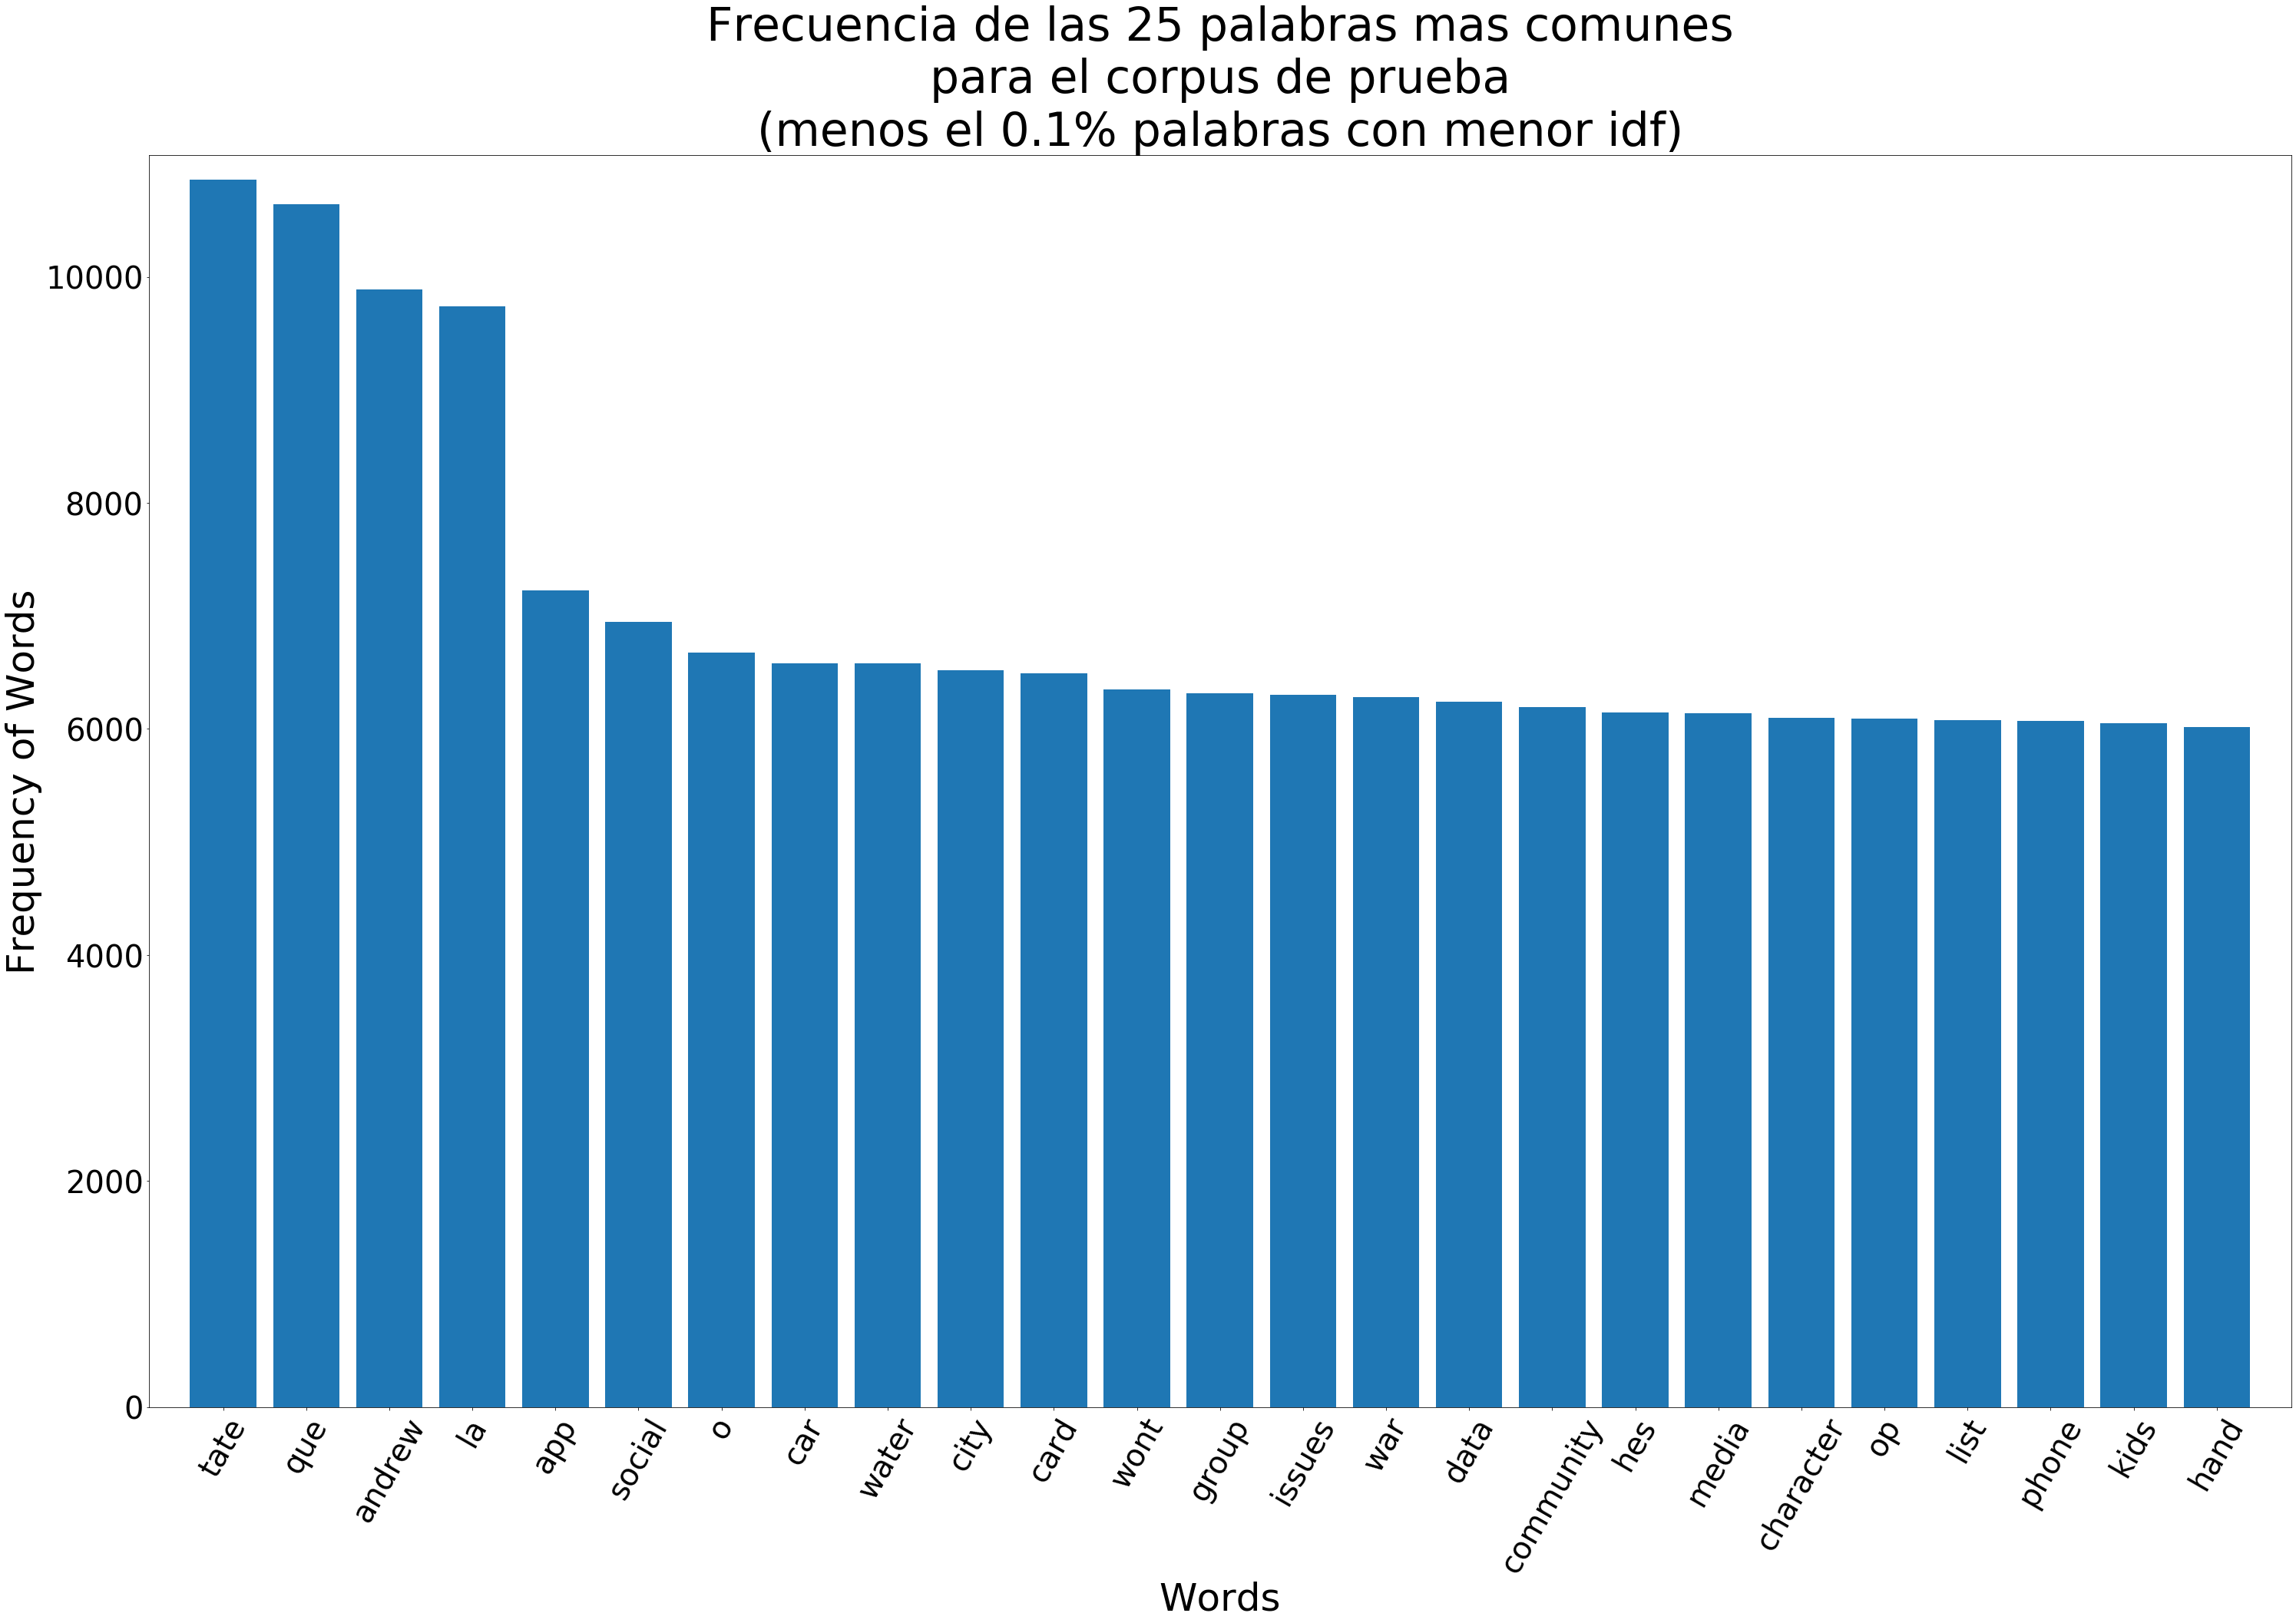

In [44]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50, 30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel("Words", fontsize=50)
plt.ylabel("Frequency of Words", fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title(
    f"Frecuencia de las 25 palabras mas comunes\npara el corpus de prueba\n"
    f"(menos el {min_percentile}% palabras con menor idf)",
    fontsize=60,
)
plt.show()

### Nube de palabras para usuarios positivos en el corpus de prueba

In [45]:
positive_users_posts = df_test.posts[df_test.label == "positive"]
"""
positive_allwords = []
for user_posts in positive_users_posts:
    for post in user_posts:
        for word in post.split():
            if word in vectorizer.vocabulary_:
                current_idx = vectorizer.vocabulary_[word]
                if vectorizer.idf_[current_idx] > min_idf_allowed:
                    positive_allwords.append(word)
"""
positive_allwords = [
    word
    for user_posts in positive_users_posts
    for post in user_posts
    for word in post.split()
    if (word in vectorizer.vocabulary_)
    and (vectorizer.idf_[vectorizer.vocabulary_[word]] > min_idf_allowed)
]

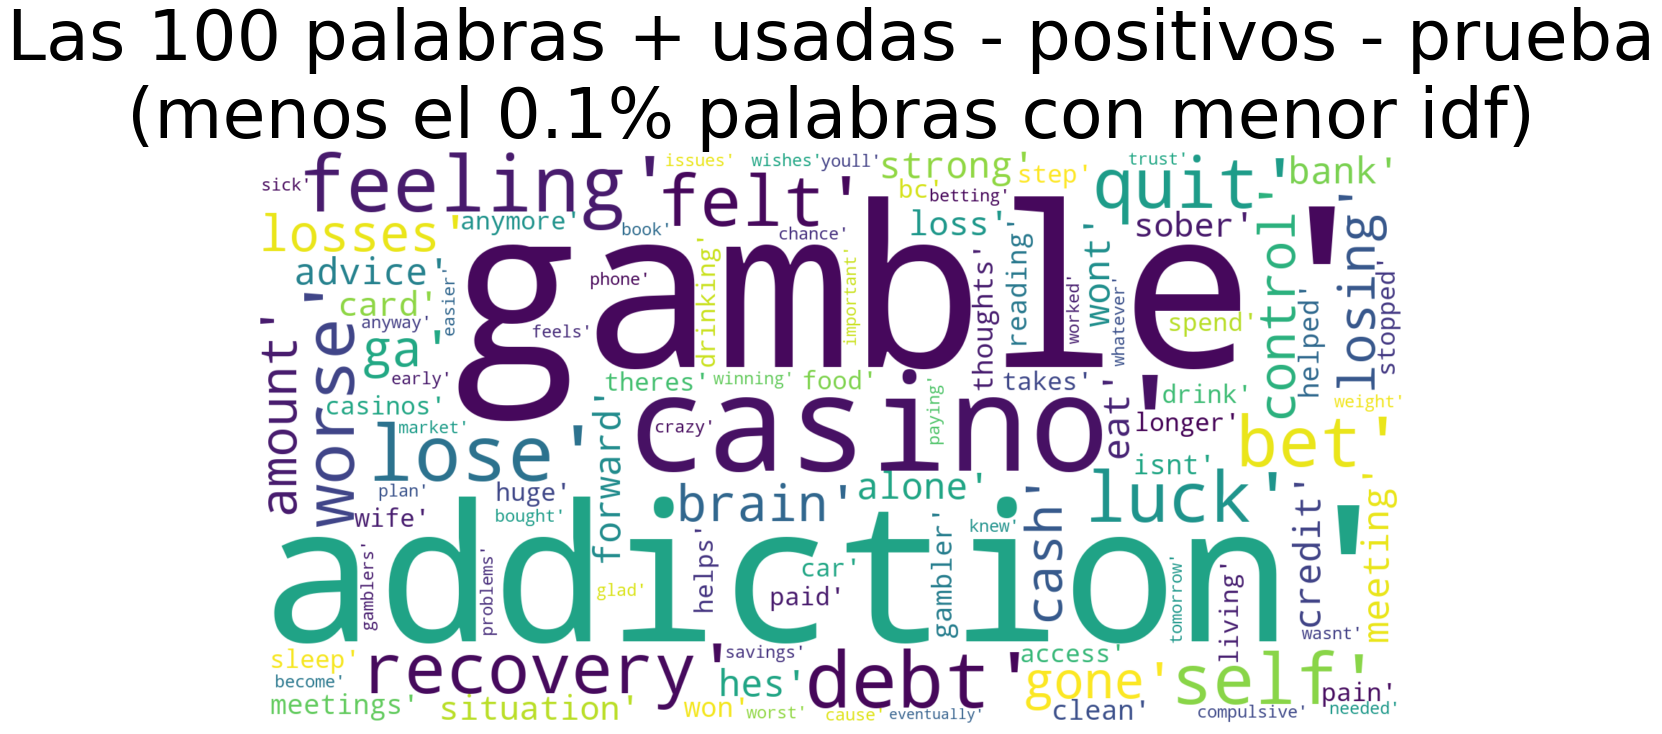

In [46]:
positive_mostcommon = FreqDist(positive_allwords).most_common(100)
positive_wordcloud = WordCloud(
    width=1600, height=800, background_color="white"
).generate(str(positive_mostcommon))
fig = plt.figure(figsize=(30, 10), facecolor="white")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(
    f"Las 100 palabras + usadas - positivos - prueba\n(menos el {min_percentile}% palabras con menor idf)",
    fontsize=70,
)
plt.tight_layout(pad=0)
plt.show()

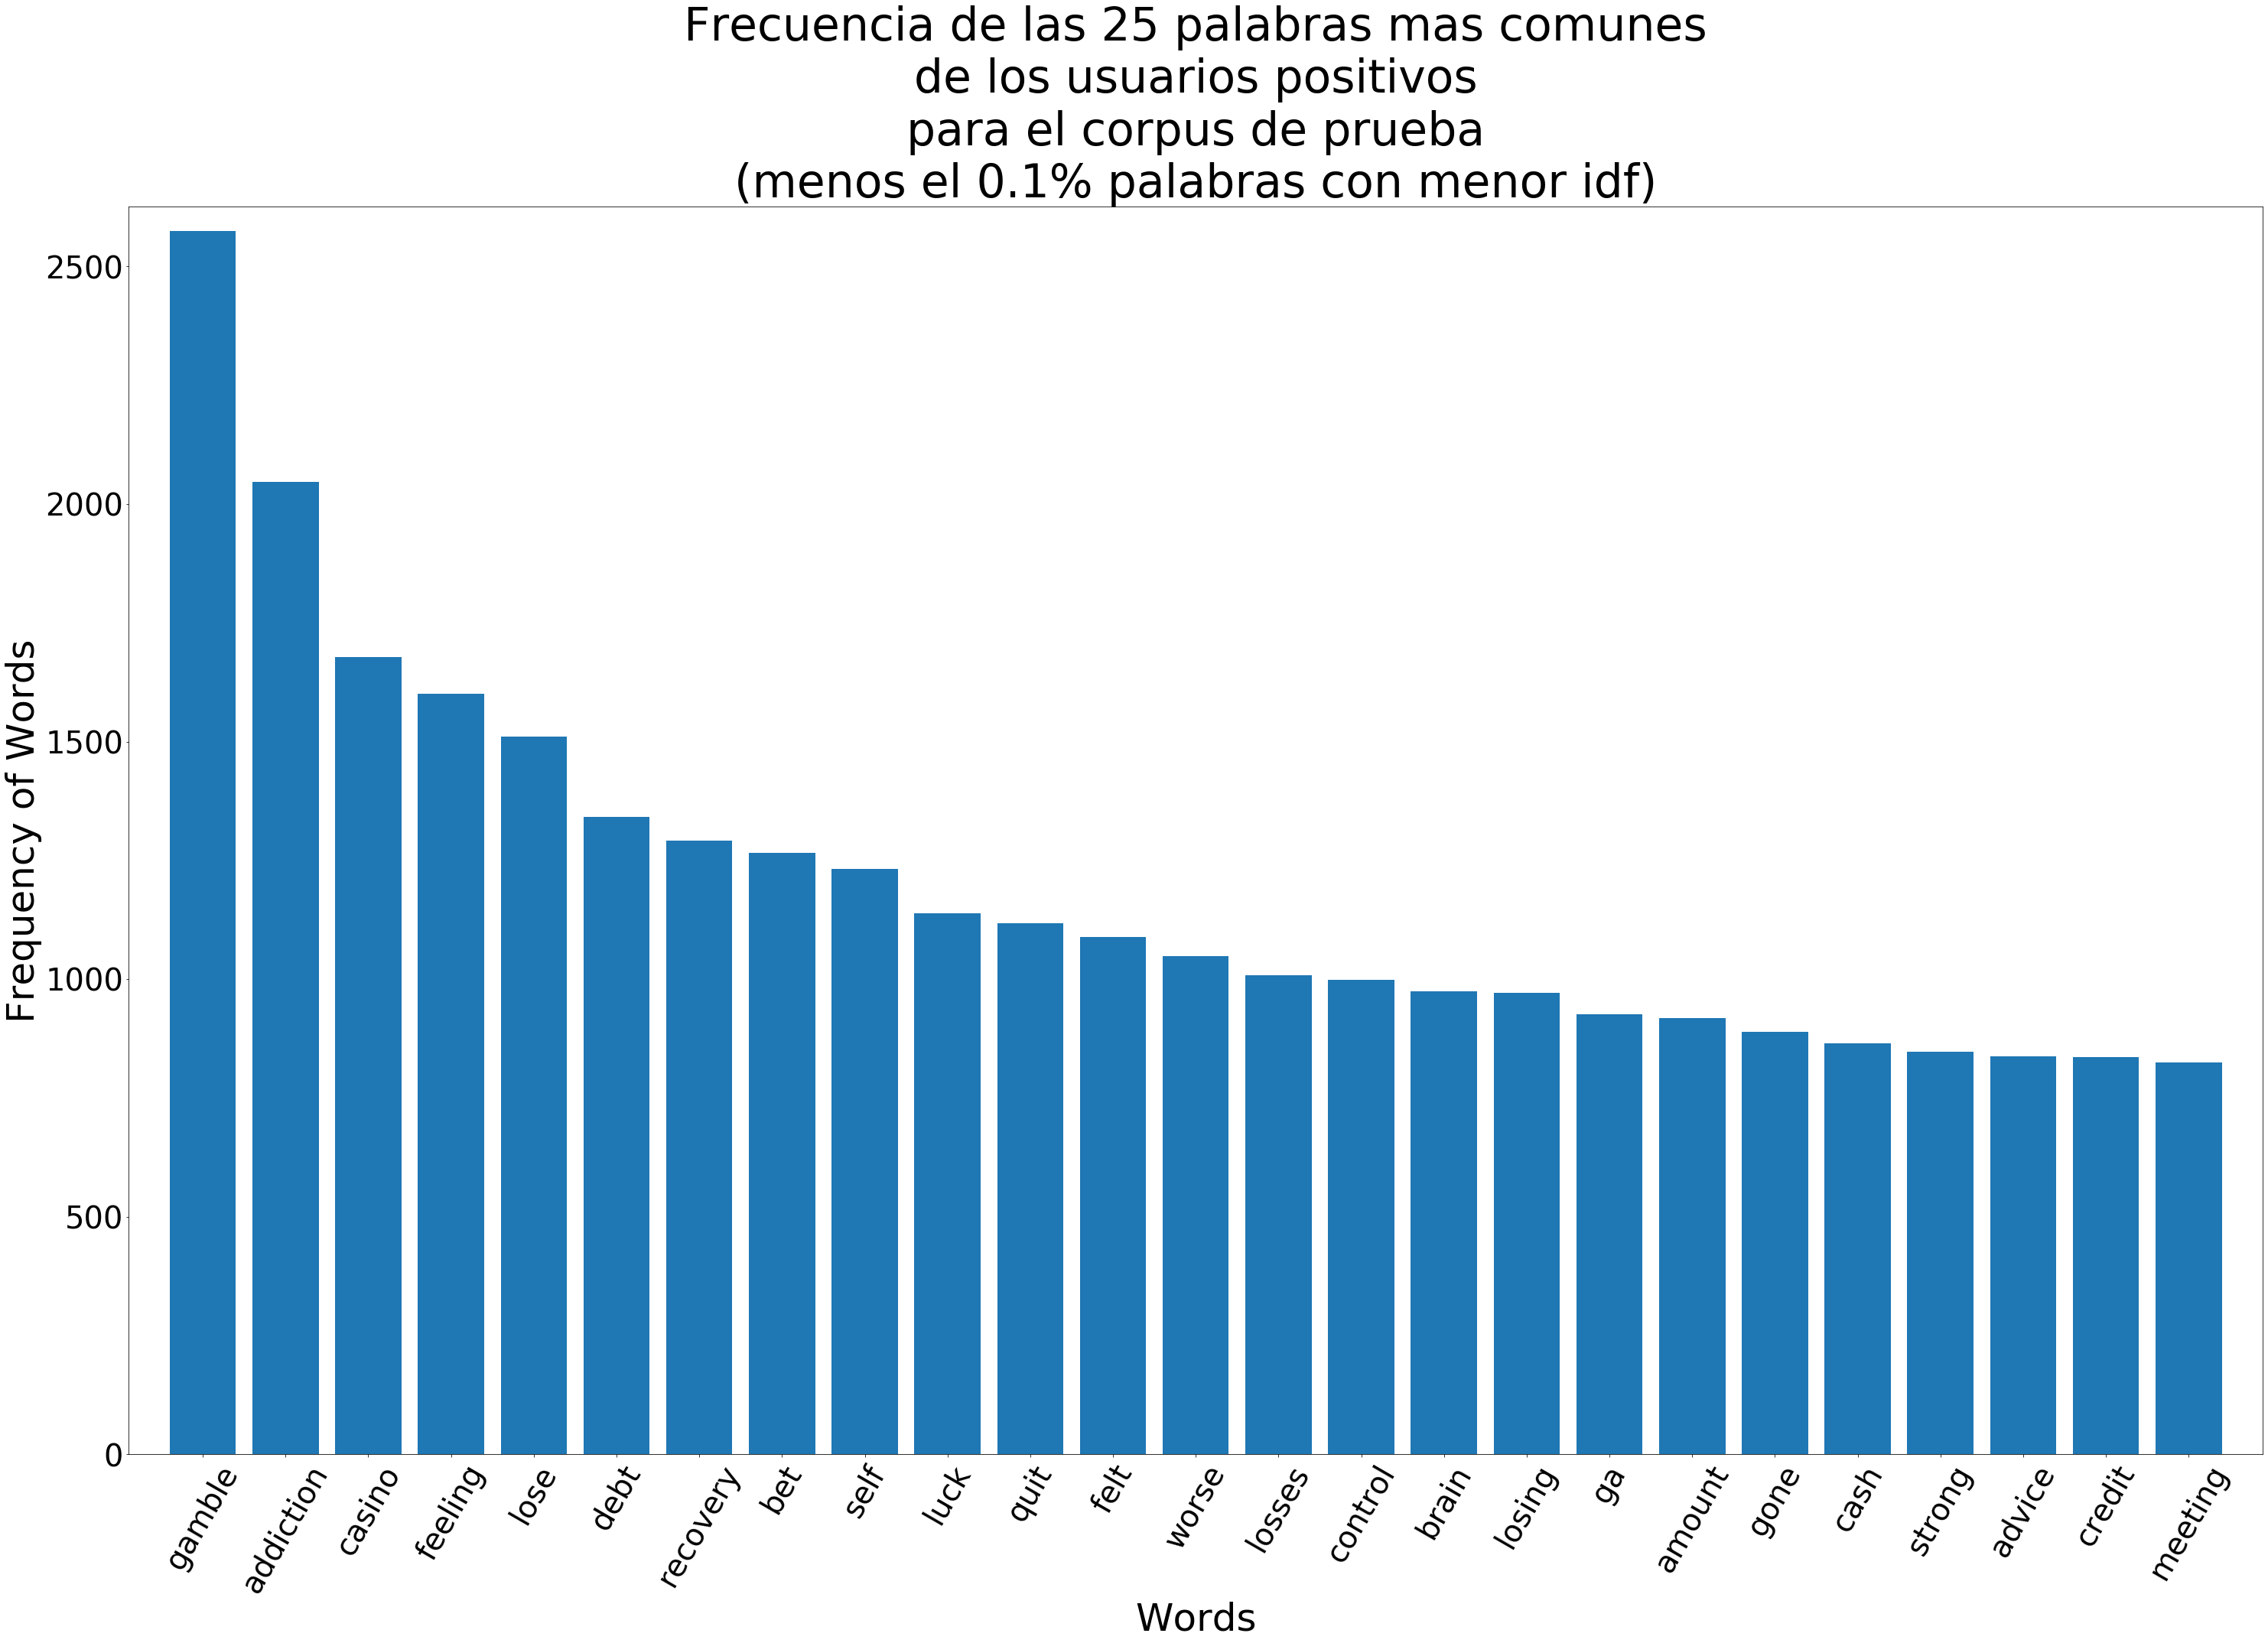

In [47]:
positive_mostcommon_small = FreqDist(positive_allwords).most_common(25)
x, y = zip(*positive_mostcommon_small)
plt.figure(figsize=(50, 30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel("Words", fontsize=50)
plt.ylabel("Frequency of Words", fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title(
    f"Frecuencia de las 25 palabras mas comunes\nde los usuarios positivos\n"
    f"para el corpus de prueba\n(menos el {min_percentile}% palabras con menor idf)",
    fontsize=60,
)
plt.show()

### Nube de palabras para usuarios negativos en el corpus de prueba

In [48]:
negative_users_posts = df_test.posts[df_test.label == "negative"]
"""
negative_allwords = []
for user_posts in negative_users_posts:
    for post in user_posts:
        for word in post.split():
            if word in vectorizer.vocabulary_:
                current_idx = vectorizer.vocabulary_[word]
                if vectorizer.idf_[current_idx] > min_idf_allowed:
                    negative_allwords.append(word)
"""
negative_allwords = [
    word
    for user_posts in negative_users_posts
    for post in user_posts
    for word in post.split()
    if (word in vectorizer.vocabulary_)
    and (vectorizer.idf_[vectorizer.vocabulary_[word]] > min_idf_allowed)
]

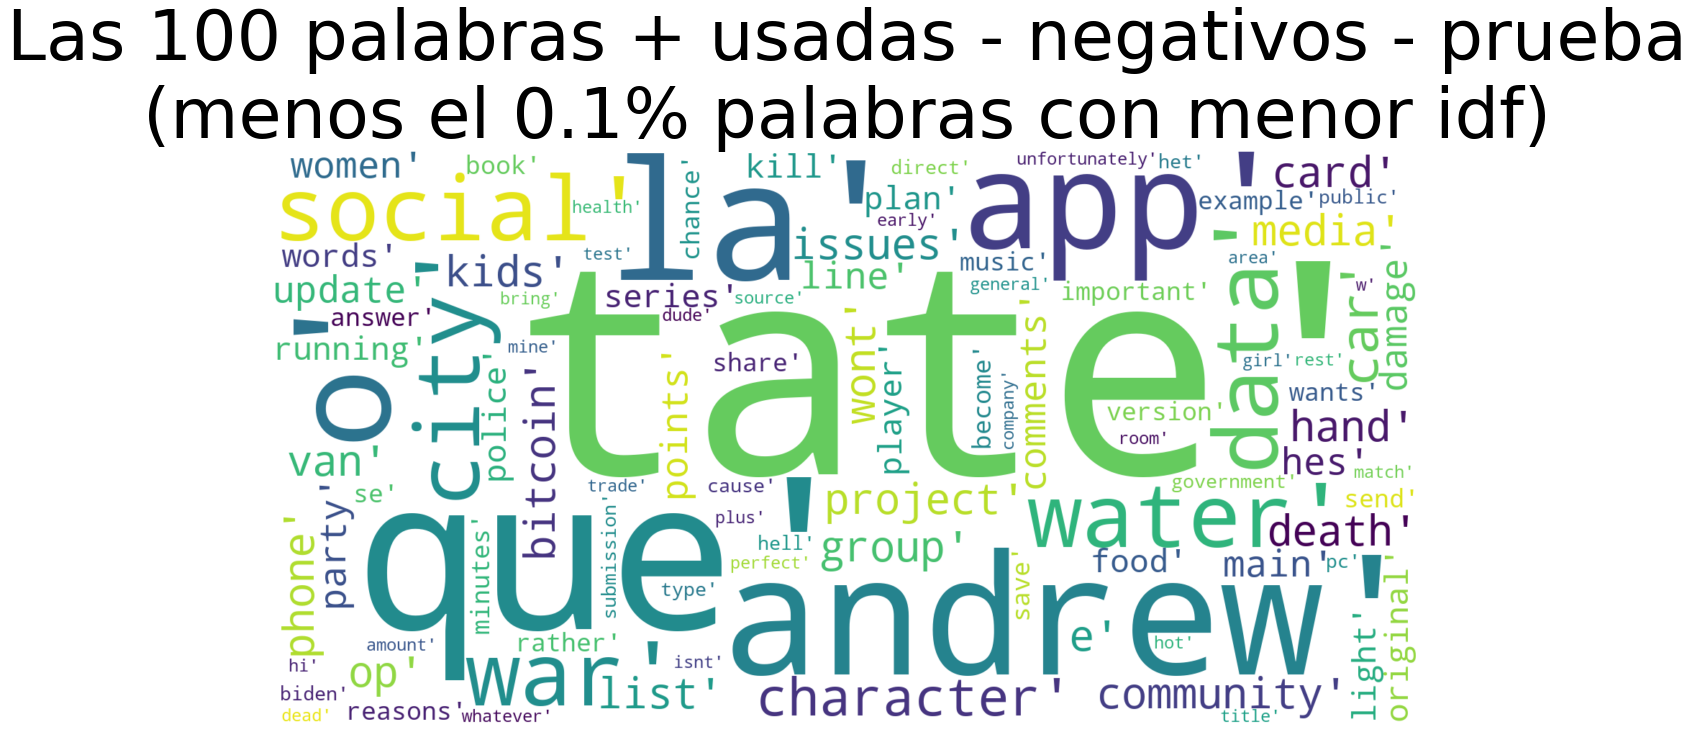

In [49]:
negative_mostcommon = FreqDist(negative_allwords).most_common(100)
negative_wordcloud = WordCloud(
    width=1600, height=800, background_color="white"
).generate(str(negative_mostcommon))
fig = plt.figure(figsize=(30, 10), facecolor="white")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(
    f"Las 100 palabras + usadas - negativos - prueba\n(menos el {min_percentile}% palabras con menor idf)",
    fontsize=70,
)
plt.tight_layout(pad=0)
plt.show()

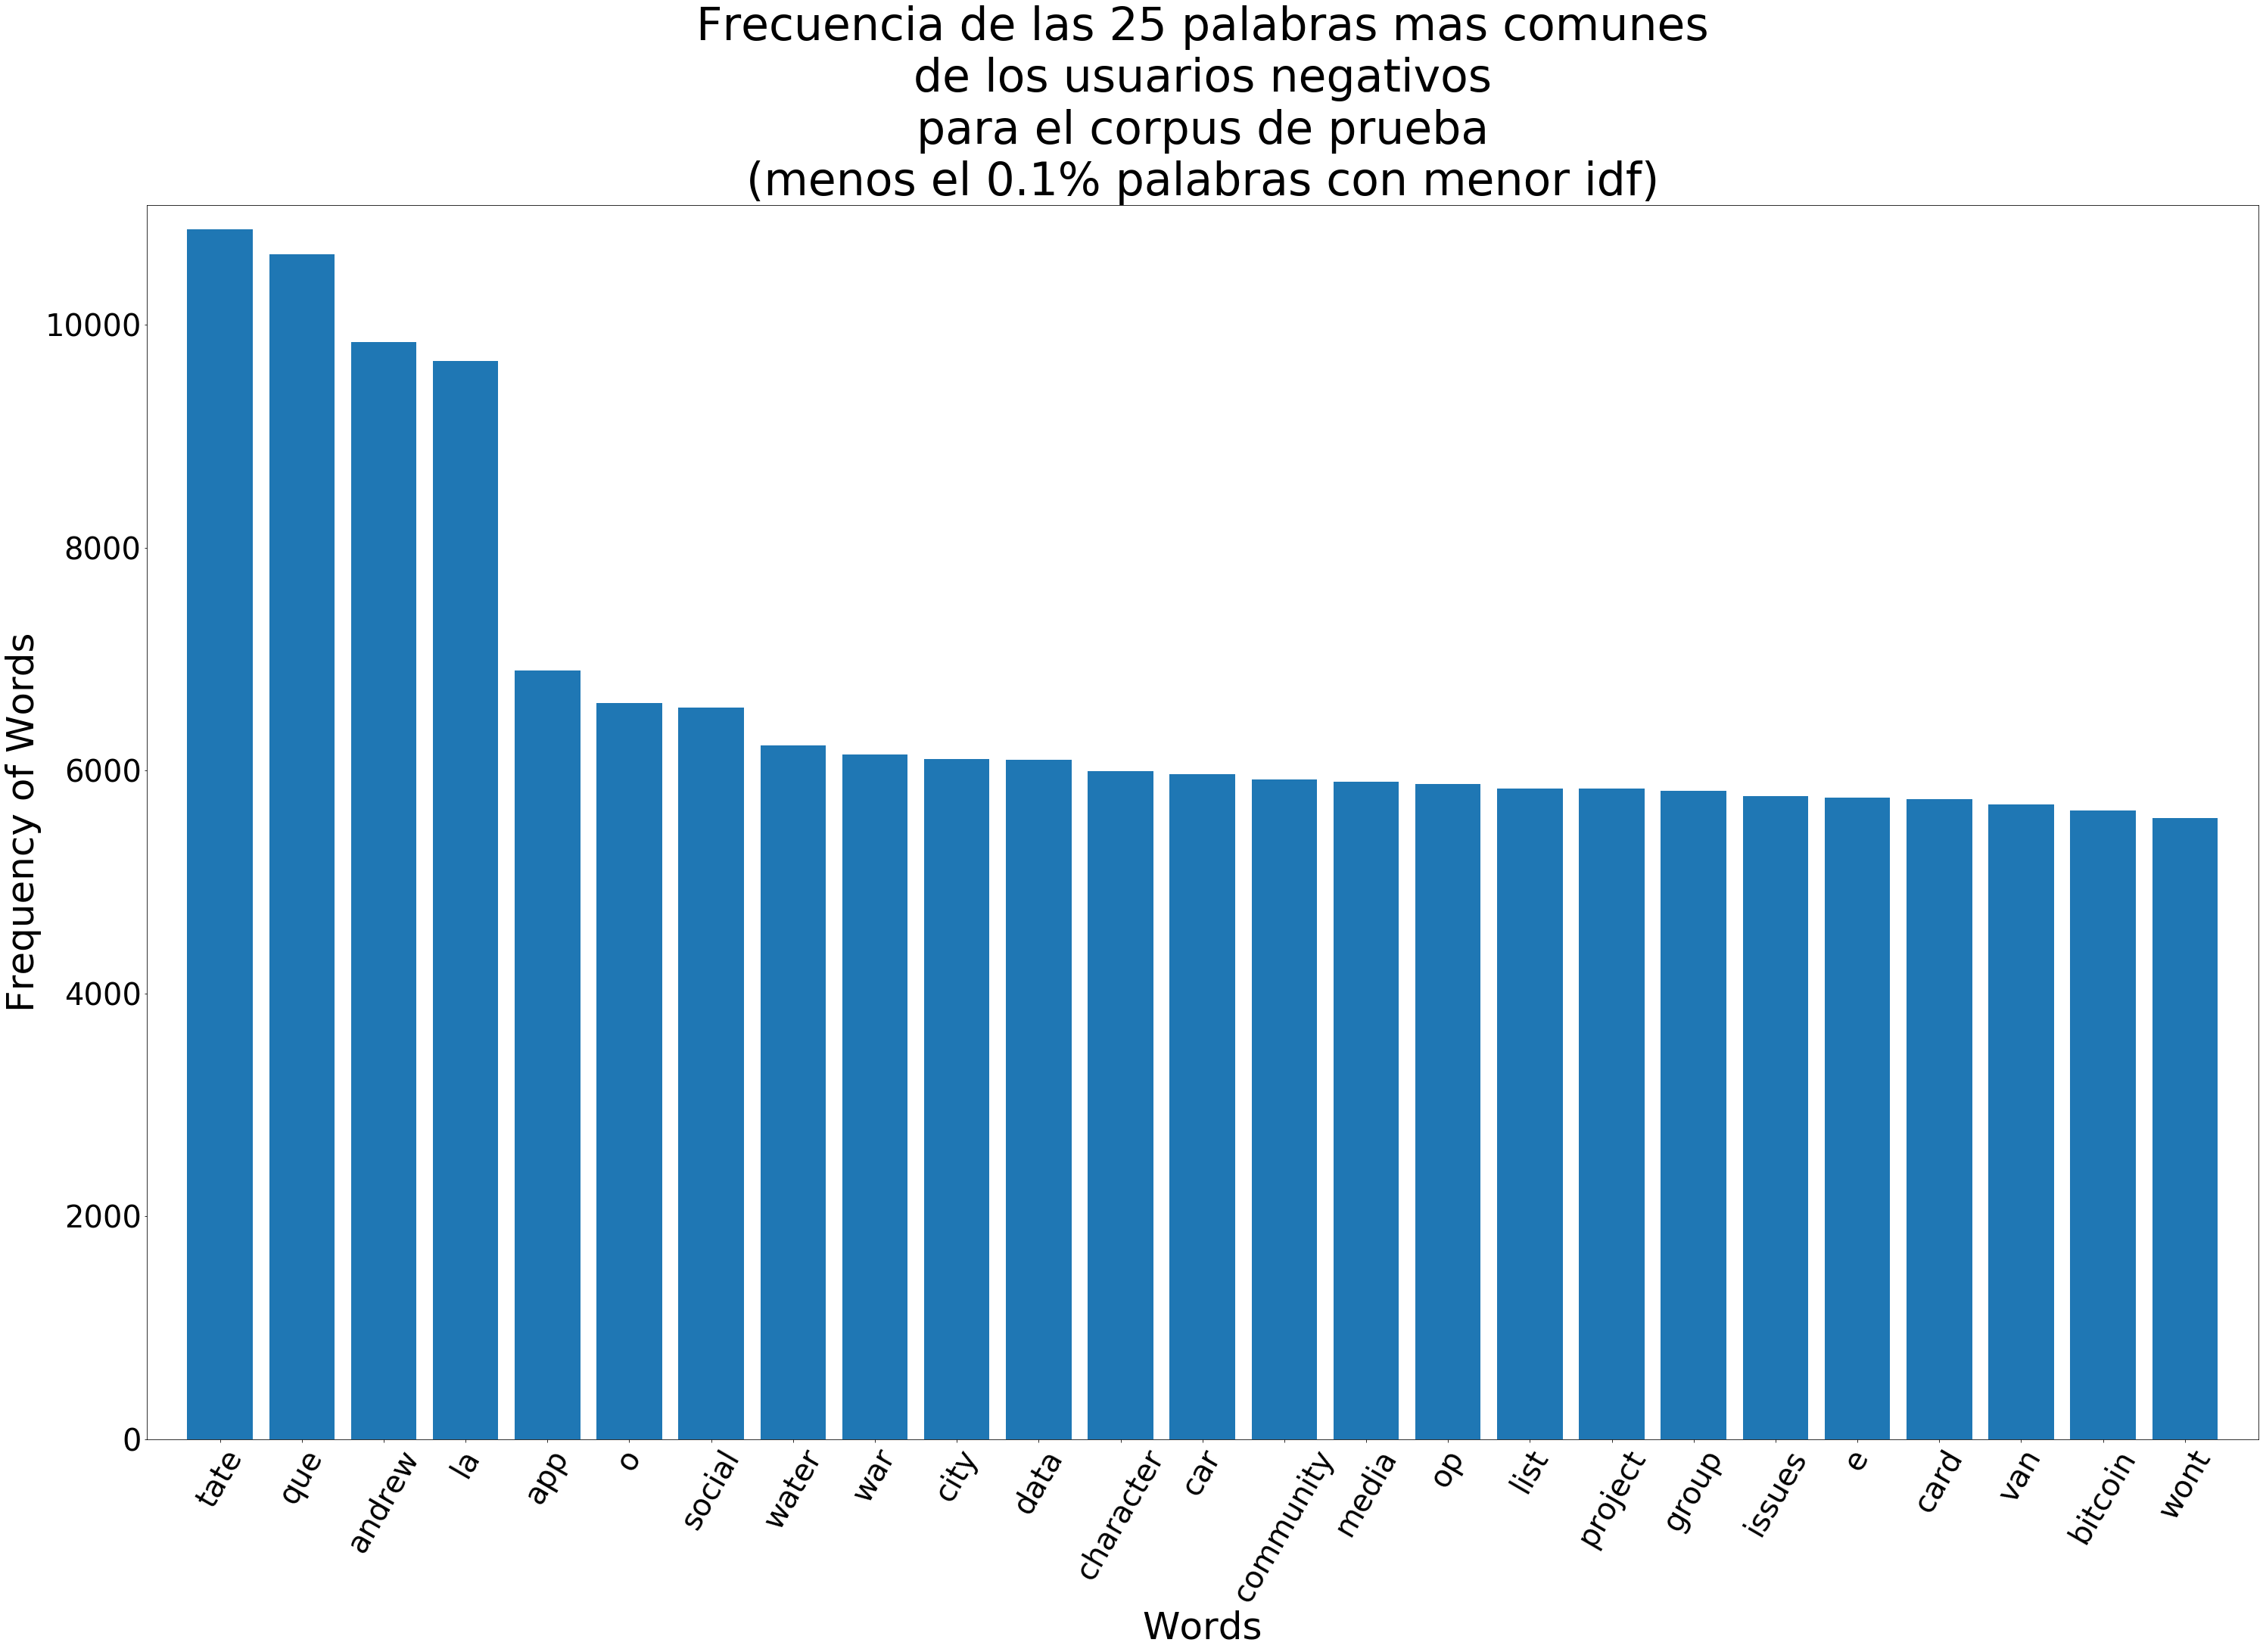

In [50]:
negative_mostcommon_small = FreqDist(negative_allwords).most_common(25)
x, y = zip(*negative_mostcommon_small)
plt.figure(figsize=(50, 30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel("Words", fontsize=50)
plt.ylabel("Frequency of Words", fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title(
    f"Frecuencia de las 25 palabras mas comunes\nde los usuarios negativos\n"
    f"para el corpus de prueba\n(menos el {min_percentile}% palabras con menor idf)",
    fontsize=60,
)
plt.show()

Mirar este [link](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/) para visualizacion de LDA.